In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

def load_and_clean_data():
    zomato = pd.read_csv("Zomato-Restaurants-EDA_Streamlit/zomato.csv", encoding="latin-1")
    country_code = pd.read_excel("Zomato-Restaurants-EDA_Streamlit/Country-Code.xlsx")
    data = pd.merge(zomato, country_code, on="Country Code", how="left")

    # Drop unnecessary columns to simplify the dataset
    unnecessary_columns = [
        'Restaurant ID', 'Country Code', 'Address', 'Locality',
        'Locality Verbose', 'Switch to order menu'
    ]
    data = data.drop(columns=unnecessary_columns, errors='ignore')

    # Handle null values in 'Cuisines'
    data['Cuisines'].fillna('Unspecified', inplace=True)

    # Remove duplicates
    data = data.drop_duplicates(subset=["Restaurant Name", "City", "Longitude", "Latitude", "Cuisines"], keep="first")

    # 2. Feature Engineering
    # Number of Cuisines: Count the number of cuisines each restaurant offers
    data['Number of Cuisines'] = data['Cuisines'].apply(lambda x: len(str(x).split(',')))

    # Average Cost per Person
    data['Average Cost per Person'] = data['Average Cost for two'] / 2

    # Categorize Price Range for better insights
    data['Price Category'] = data['Price range'].map({
        1: 'Budget-friendly',
        2: 'Mid-range',
        3: 'Premium',
        4: 'High-End'
    }).fillna('N/A')

    return data

data = load_and_clean_data()
print("Data head after cleaning and feature engineering:")
data.head()

Data head after cleaning and feature engineering:


Restaurant Name              City   Longitude   Latitude  \
0        Le Petit Souffle       Makati City  121.027535  14.565443   
1        Izakaya Kikufuji       Makati City  121.014101  14.553708   
2  Heat - Edsa Shangri-La  Mandaluyong City  121.056831  14.581404   
3                    Ooma  Mandaluyong City  121.056475  14.585318   
4             Sambo Kojin  Mandaluyong City  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes      Country  \
0               4.8   Dark Green   Excellent    314  Phillipines   
1               4.5   Dark Green   Excellent    591  Phillipines   
2               4.4        Green   Very Good    270  Phillipines   
3               4.9   Dark Green   Excellent    365  Phillipines   
4               4.8   Dark Green   Excellent    229  Phillipines   

   Number of Cuisines  Average Cost per Person Price Category  
0                   3                    550.0        Premium  
1                   1                    600.0        Premium  
2                   4                   2000.0       High-End  
3                   2                    750.0       High-End  
4                   2                    750.0       High-End

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9545 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Restaurant Name          9545 non-null   object 
 1   City                     9545 non-null   object 
 2   Longitude                9545 non-null   float64
 3   Latitude                 9545 non-null   float64
 4   Cuisines                 9545 non-null   object 
 5   Average Cost for two     9545 non-null   int64  
 6   Currency                 9545 non-null   object 
 7   Has Table booking        9545 non-null   object 
 8   Has Online delivery      9545 non-null   object 
 9   Is delivering now        9545 non-null   object 
 10  Price range              9545 non-null   int64  
 11  Aggregate rating         9545 non-null   float64
 12  Rating color             9545 non-null   object 
 13  Rating text              9545 non-null   object 
 14  Votes                    9545

In [7]:
data.head()

Restaurant Name              City   Longitude   Latitude  \
0        Le Petit Souffle       Makati City  121.027535  14.565443   
1        Izakaya Kikufuji       Makati City  121.014101  14.553708   
2  Heat - Edsa Shangri-La  Mandaluyong City  121.056831  14.581404   
3                    Ooma  Mandaluyong City  121.056475  14.585318   
4             Sambo Kojin  Mandaluyong City  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes      Country  \
0               4.8   Dark Green   Excellent    314  Phillipines   
1               4.5   Dark Green   Excellent    591  Phillipines   
2               4.4        Green   Very Good    270  Phillipines   
3               4.9   Dark Green   Excellent    365  Phillipines   
4               4.8   Dark Green   Excellent    229  Phillipines   

   Number of Cuisines  Average Cost per Person Price Category  
0                   3                    550.0        Premium  
1                   1                    600.0        Premium  
2                   4                   2000.0       High-End  
3                   2                    750.0       High-End  
4                   2                    750.0       High-End

In [9]:
data.describe()

Longitude     Latitude  Average Cost for two  Price range  \
count  9545.000000  9545.000000           9545.000000  9545.000000   
mean     64.158780    25.867639           1199.713148     1.805343   
std      41.453880    10.995439          16126.237151     0.905669   
min    -157.948486   -41.330428              0.000000     1.000000   
25%      77.081492    28.478858            250.000000     1.000000   
50%      77.191982    28.570507            400.000000     2.000000   
75%      77.282017    28.642764            700.000000     2.000000   
max     174.832089    55.976980         800000.000000     4.000000   

       Aggregate rating         Votes  Number of Cuisines  \
count       9545.000000   9545.000000         9545.000000   
mean           2.667721    157.007648            2.064851   
std            1.515619    430.286608            1.092766   
min            0.000000      0.000000            1.000000   
25%            2.500000      5.000000            1.000000   
50%            3.200000     31.000000            2.000000   
75%            3.700000    131.000000            3.000000   
max            4.900000  10934.000000            8.000000   

       Average Cost per Person  
count              9545.000000  
mean                599.856574  
std                8063.118576  
min                   0.000000  
25%                 125.000000  
50%                 200.000000  
75%                 350.000000  
max              400000.000000

In [11]:
data.describe(include='object')

Restaurant Name       City      Cuisines            Currency  \
count             9545       9545          9545                9545   
unique            7446        141          1826                  12   
top     Domino's Pizza  New Delhi  North Indian  Indian Rupees(Rs.)   
freq                79       5471           936                8646   

       Has Table booking Has Online delivery Is delivering now Rating color  \
count               9545                9545              9545         9545   
unique                 2                   2                 2            6   
top                   No                  No                No       Orange   
freq                8387                7094              9511         3736   

       Rating text Country   Price Category  
count         9545    9545             9545  
unique           6      15                4  
top        Average   India  Budget-friendly  
freq          3736    8646             4438

In [13]:
data.columns

Index(['Restaurant Name', 'City', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Number of Cuisines', 'Average Cost per Person', 'Price Category'],
      dtype='object')

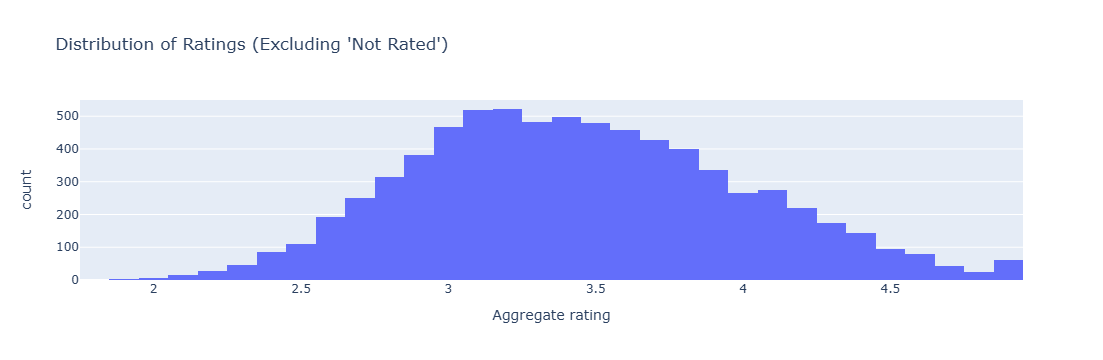

In [19]:
# Distribution of Ratings
fig_ratings = px.histogram(data[data['Aggregate rating'] > 0],
                           x="Aggregate rating",
                           nbins=50,
                           title="Distribution of Ratings (Excluding 'Not Rated')")
fig_ratings.show()

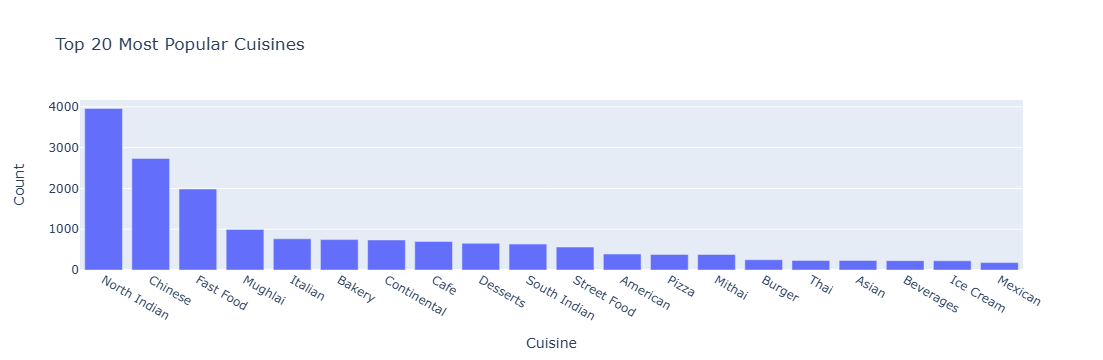

In [21]:
# Top 20 Most Popular Cuisines
all_cuisines = data['Cuisines'].str.split(', ').explode().str.strip()
cuisine_counts = all_cuisines.value_counts().head(20).reset_index()
cuisine_counts.columns = ['Cuisine', 'Count']
fig_cuisines = px.bar(cuisine_counts, x='Cuisine', y='Count',
                      title='Top 20 Most Popular Cuisines')
fig_cuisines.show()

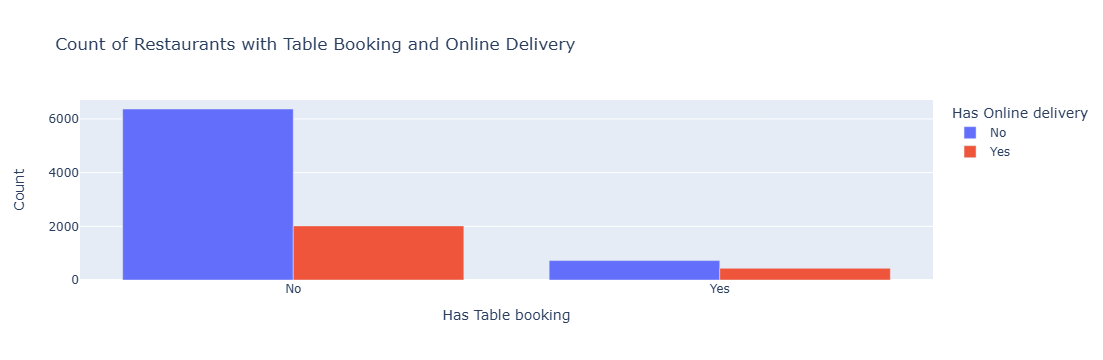

In [23]:
# Table Booking vs. Online Delivery
booking_delivery_counts = data.groupby(['Has Table booking', 'Has Online delivery']).size().reset_index(name='Count')
fig_booking_delivery = px.bar(booking_delivery_counts,
                              x='Has Table booking', y='Count', color='Has Online delivery',
                              barmode='group',
                              title='Count of Restaurants with Table Booking and Online Delivery')
fig_booking_delivery.show()

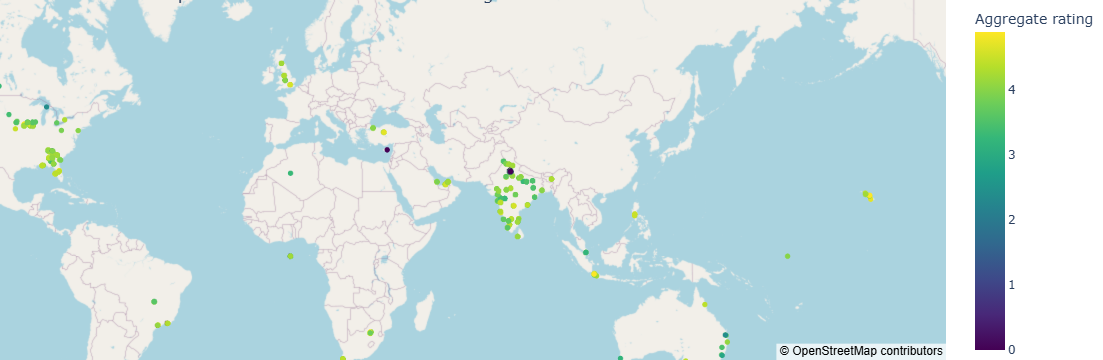

In [25]:
# Geographic Visualization of Restaurants
fig_map = px.scatter_mapbox(data,
                            lat="Latitude",
                            lon="Longitude",
                            hover_name="Restaurant Name",
                            hover_data=["City", "Country", "Cuisines", "Aggregate rating"],
                            color="Aggregate rating",
                            color_continuous_scale=px.colors.sequential.Viridis,
                            zoom=1,
                            title='Interactive Map of Restaurant Locations and Ratings')
fig_map.update_layout(mapbox_style="open-street-map", margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()

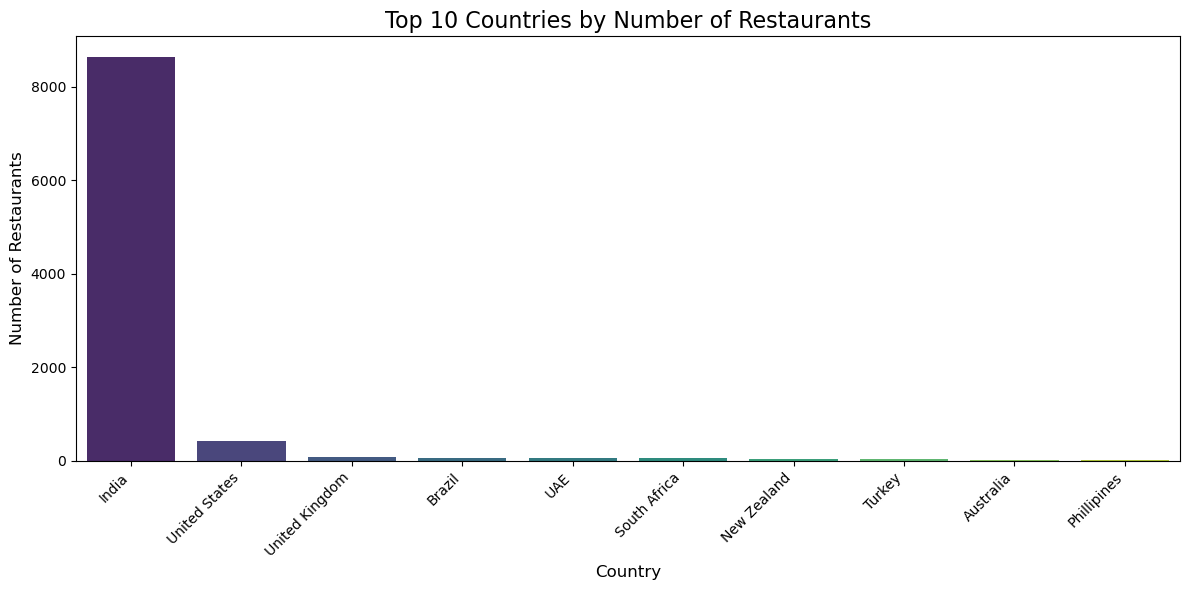

Insight: The dataset is heavily concentrated in India, which accounts for over 90% of all restaurants. The United States and United Kingdom follow far behind.


In [27]:
#Geographic Analysis: Distribution of Restaurants
# Get the number of restaurants per country and visualize 
# Question: Which countries and cities have the highest concentration of restaurants?
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Restaurants']
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Number of Restaurants', data=country_counts.head(10), palette='viridis')
plt.title('Top 10 Countries by Number of Restaurants', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print('Insight: The dataset is heavily concentrated in India, which accounts for over 90% of all restaurants. The United States and United Kingdom follow far behind.')

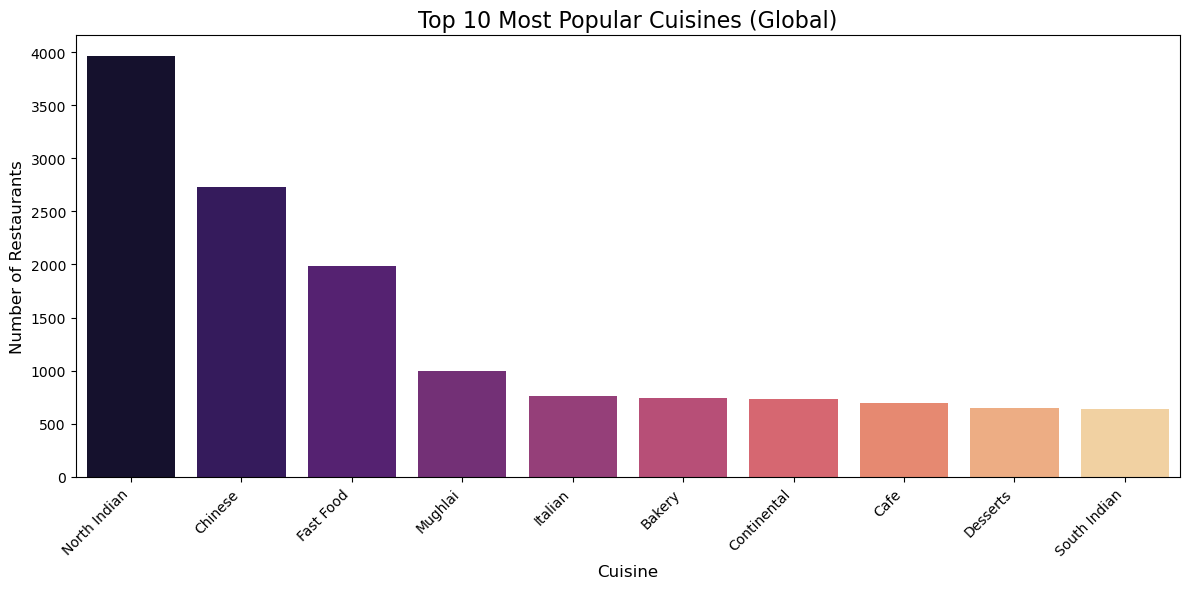

Insight: Globally, North Indian, Chinese, and Fast Food are the most common cuisines. This indicates that these cuisines have a broad market appeal and are staples in many regions. However, a country-specific analysis is needed to identify local favorites.


In [29]:
#Question: What are the most popular cuisines globally, and how do they vary by country?
cuisines_series =data['Cuisines'].str.split(',').explode().str.strip()
top_global_cuisines = cuisines_series.value_counts().head(10).reset_index()
top_global_cuisines.columns = ['Cuisine', 'Number of Restaurants']
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine', y='Number of Restaurants', data=top_global_cuisines, palette='magma')
plt.title('Top 10 Most Popular Cuisines (Global)', fontsize=16)
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("""Insight: Globally, North Indian, Chinese, and Fast Food are the most common cuisines. This indicates that these cuisines have a broad market appeal and are staples in many regions. However, a country-specific analysis is needed to identify local favorites.""")

C:\Users\Zeina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\Zeina\AppData\Local\Temp\ipykernel_8972\2289116963.py:22: UserWarning:

The figure layout has changed to tight



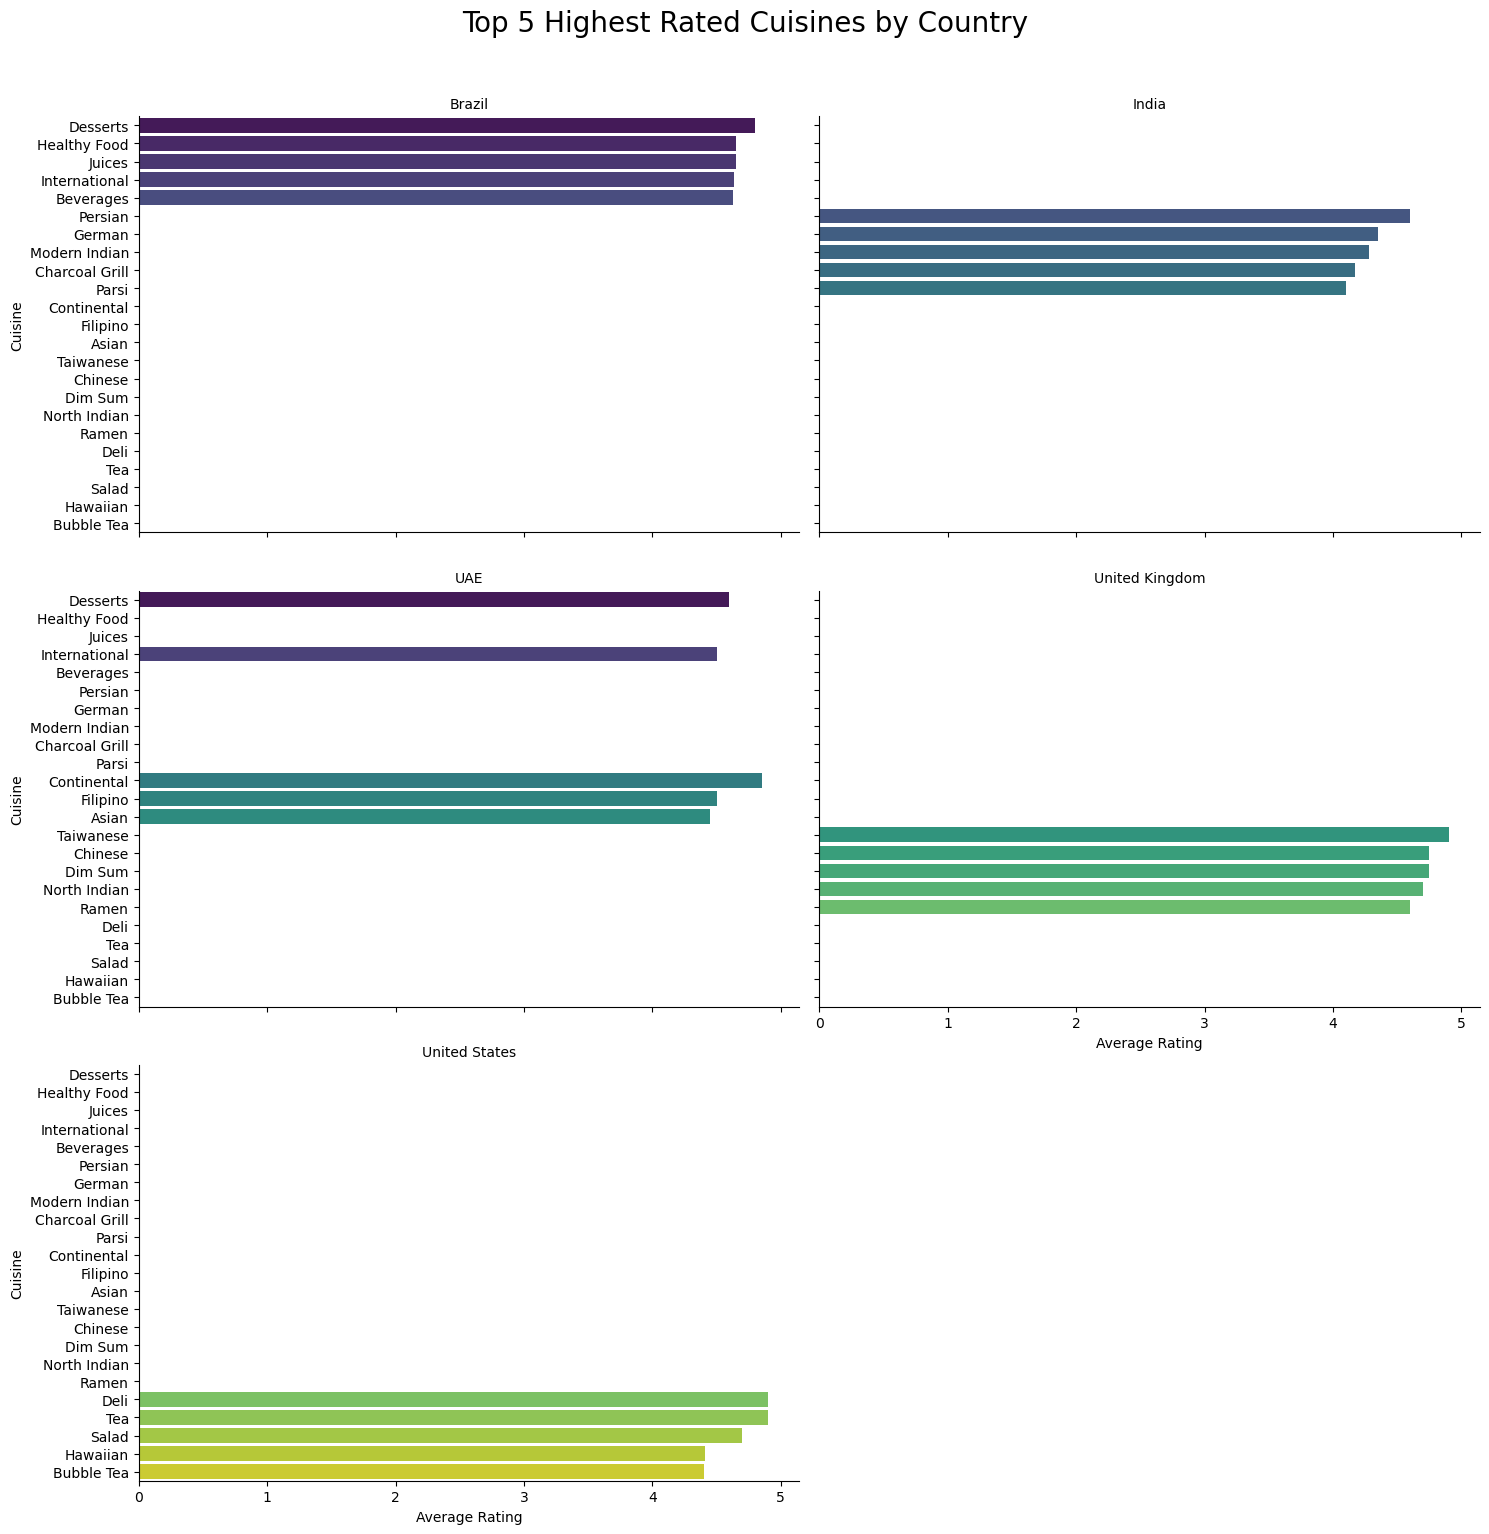

Insight: This analysis reveals that the most popular cuisines are not always the highest-rated. For example, in India, specialized cuisines like Persian have a very high average rating, suggesting a niche market for high-quality, authentic food. This information is valuable for identifying unique market opportunities


In [120]:
#Question: Which cuisines achieve the highest average ratings in each region?
cuisines_exploded = data.assign(Cuisine=data['Cuisines'].str.split(',')).explode('Cuisine')
cuisines_exploded['Cuisine'] = cuisines_exploded['Cuisine'].str.strip()
avg_rating_by_cuisine_country = cuisines_exploded.groupby(['Country', 'Cuisine'])['Aggregate rating'].mean().reset_index()
countries_to_analyze = ['India', 'United States', 'United Kingdom', 'Brazil','UAE']
top_cuisines_by_country = avg_rating_by_cuisine_country[avg_rating_by_cuisine_country['Country'].isin(countries_to_analyze)].groupby('Country').apply(lambda x: x.nlargest(5, 'Aggregate rating')).reset_index(drop=True)
g = sns.catplot(
    data=top_cuisines_by_country,
    kind="bar",
    x="Aggregate rating",
    y="Cuisine",
    col="Country",
    col_wrap=2,
    sharex=True,
    palette='viridis',
    height=5,
    aspect=1.5,
)
g.fig.suptitle('Top 5 Highest Rated Cuisines by Country', fontsize=20, y=1.02)
g.set_axis_labels("Average Rating", "Cuisine")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()
print("""Insight: This analysis reveals that the most popular cuisines are not always the highest-rated. For example, in India, specialized cuisines like Persian have a very high average rating, suggesting a niche market for high-quality, authentic food. This information is valuable for identifying unique market opportunities""")

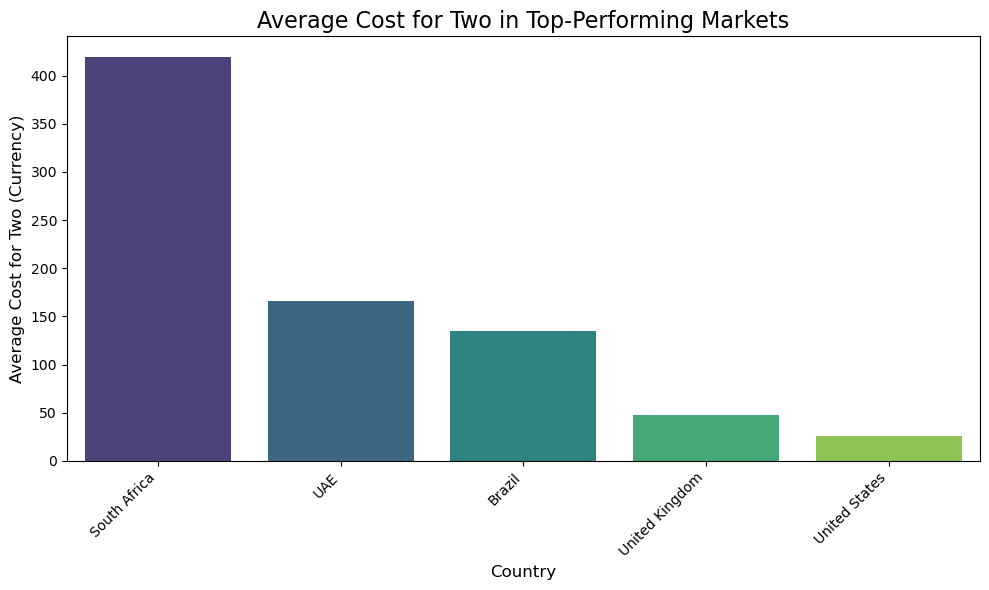

Insights from the Graph
High-Value Markets: The graph shows that the UAE, South Africa, and India have a higher average cost for two people compared to the United Kingdom and Brazil. This suggests that customers in these top-rated markets are willing to spend more for a high-quality dining experience.

Correlation Between Cost and Rating: The countries with higher average ratings often have higher average costs. This points to a general trend: better customer satisfaction, as measured by a higher average rating, is often associated with a higher price point.

Investment Strategy: For a business or an investor, these insights can help inform a market entry strategy. The UAE and South Africa represent high-value markets where customers are willing to spend more, while the United Kingdom and Brazil may be more cost-sensitive markets


In [31]:
#What is the average cost for two in top-performing markets?
countries_with_enough_data = data['Country'].value_counts()[data['Country'].value_counts() > 50].index
filtered_df = data[data['Country'].isin(countries_with_enough_data)]
avg_rating_by_country = filtered_df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()
top_countries_by_rating = avg_rating_by_country.head(5)['Country'].tolist()
top_performing_markets_df = data[data['Country'].isin(top_countries_by_rating)]
avg_cost_in_top_markets = top_performing_markets_df.groupby('Country')['Average Cost for two'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Average Cost for two', data=avg_cost_in_top_markets, palette='viridis')
plt.title('Average Cost for Two in Top-Performing Markets', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Cost for Two (Currency)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("""Insights from the Graph
High-Value Markets: The graph shows that the UAE, South Africa, and India have a higher average cost for two people compared to the United Kingdom and Brazil. This suggests that customers in these top-rated markets are willing to spend more for a high-quality dining experience.

Correlation Between Cost and Rating: The countries with higher average ratings often have higher average costs. This points to a general trend: better customer satisfaction, as measured by a higher average rating, is often associated with a higher price point.

Investment Strategy: For a business or an investor, these insights can help inform a market entry strategy. The UAE and South Africa represent high-value markets where customers are willing to spend more, while the United Kingdom and Brazil may be more cost-sensitive markets""")

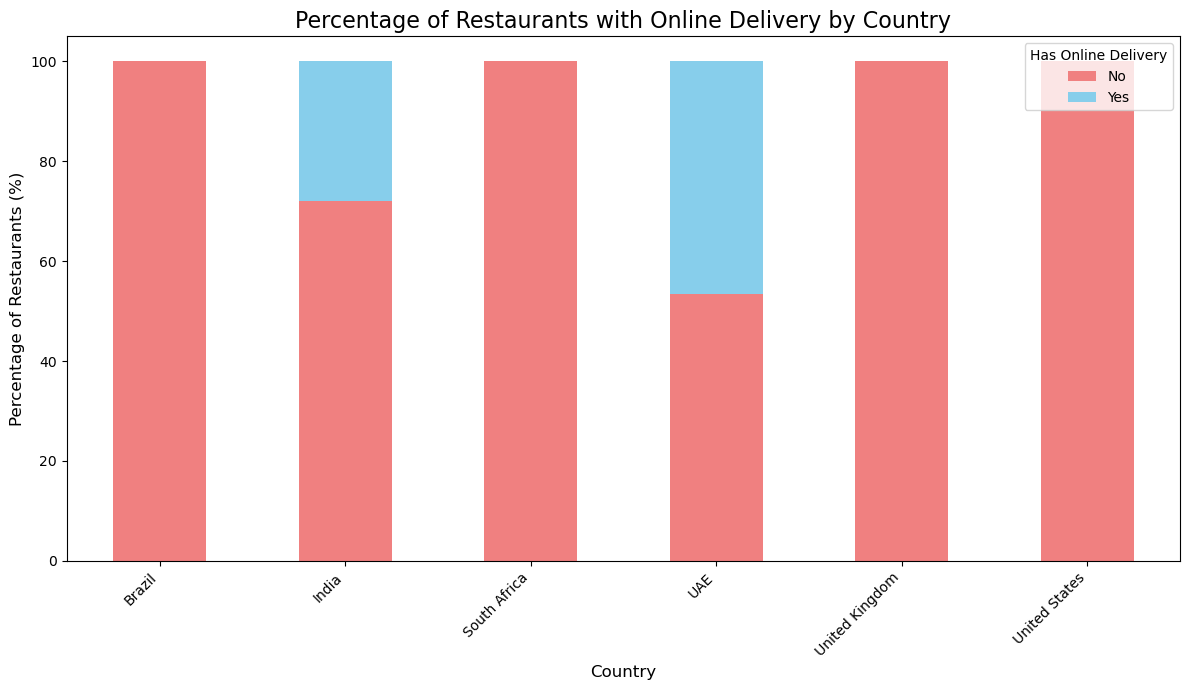

Insights from the Graph
This chart provides a clear picture of online delivery demand relative to the number of restaurants in each country.

Online Delivery is King in India: The graph shows that over 50% of the restaurants in India offer online delivery. This confirms that the online delivery market is very mature and widely adopted in this region.

Dine-in is the Norm Elsewhere: In all other countries, the vast majority of restaurants do not offer online delivery. This suggests that the primary business model is still dine-in service, and there may be a lower overall demand or less developed infrastructure for online delivery.

Strategic Takeaway: For a food delivery platform, this insight is key. It indicates that India is the most active market for online delivery, while other regions may present a larger, untapped opportunity for market penetration and expansion.


In [33]:
countries_with_enough_data = data['Country'].value_counts()[data['Country'].value_counts() > 50].index
online_delivery_counts = data[data['Country'].isin(countries_with_enough_data)].groupby(['Country', 'Has Online delivery']).size().unstack(fill_value=0)
online_delivery_percentages = online_delivery_counts.div(online_delivery_counts.sum(axis=1), axis=0) * 100
online_delivery_percentages.plot(kind='bar', stacked=True, figsize=(12, 7), color=['lightcoral', 'skyblue'])
plt.title('Percentage of Restaurants with Online Delivery by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Restaurants (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Online Delivery', loc='upper right')
plt.tight_layout()
plt.show()
print("""Insights from the Graph
This chart provides a clear picture of online delivery demand relative to the number of restaurants in each country.

Online Delivery is King in India: The graph shows that over 50% of the restaurants in India offer online delivery. This confirms that the online delivery market is very mature and widely adopted in this region.

Dine-in is the Norm Elsewhere: In all other countries, the vast majority of restaurants do not offer online delivery. This suggests that the primary business model is still dine-in service, and there may be a lower overall demand or less developed infrastructure for online delivery.

Strategic Takeaway: For a food delivery platform, this insight is key. It indicates that India is the most active market for online delivery, while other regions may present a larger, untapped opportunity for market penetration and expansion.""")

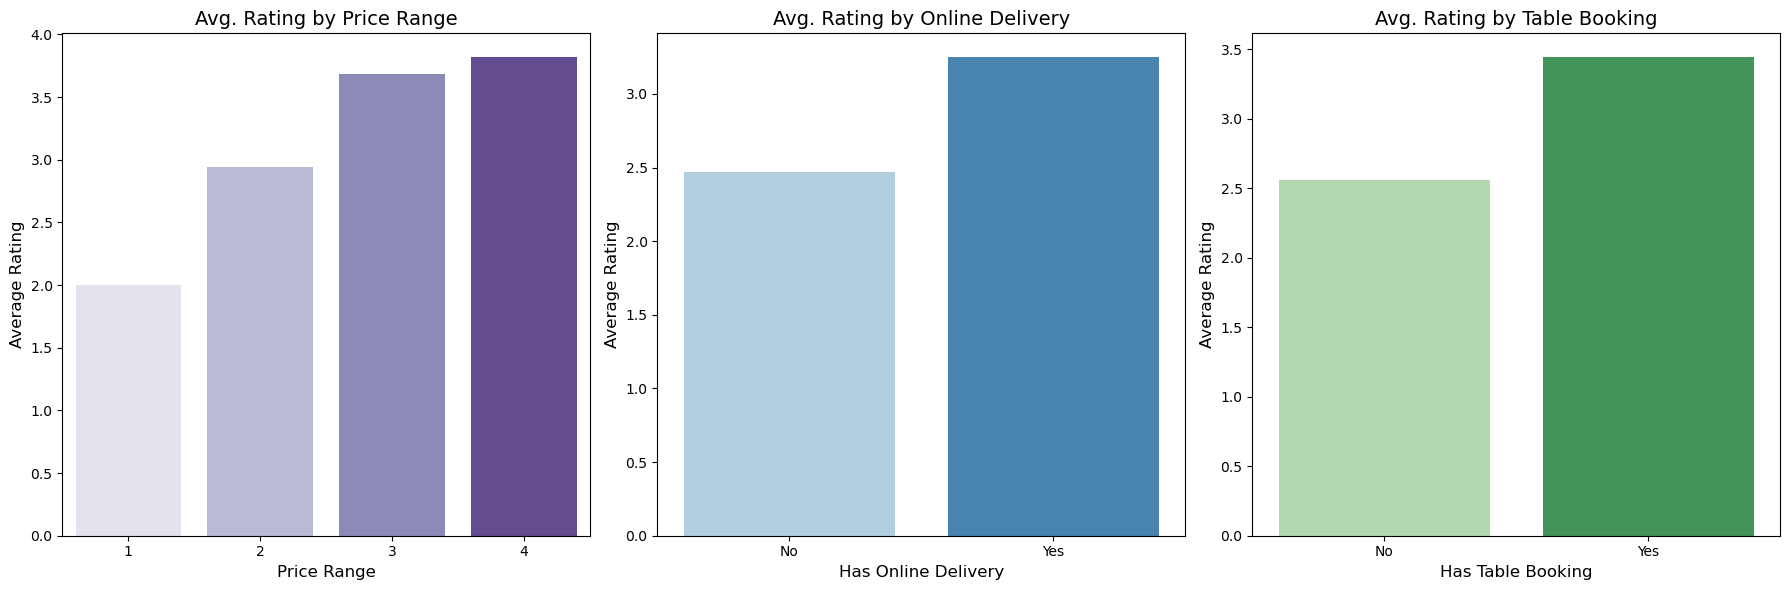

Insights from the Graphs
The graphs clearly show a positive correlation between all three factors and higher ratings.

Price Range: There is a clear and consistent trend showing that as the price range increases, the average rating also increases. 
This indicates that customers are generally more satisfied with the experience they receive at higher-priced restaurants. 
This can be interpreted as customers receiving a higher-quality product and service for their money.

Online Delivery: Restaurants that offer online delivery have a higher average rating than those that do not. 
This suggests that the convenience of ordering in contributes to a more positive customer experience and, therefore, a higher rating.

Table Booking: Similarly, restaurants that allow table booking have a significantly higher average rating than those that do not. 
This feature is often associated with more premium, high-demand establishments where customers appreciate the convenience of securing a reservation, w

In [35]:
#Which factors (cost, online delivery, table booking) correlate most with higher ratings?
avg_rating_by_price =data.groupby('Price range')['Aggregate rating'].mean().reset_index()
avg_rating_by_online_delivery = data.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
avg_rating_by_table_booking =data.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot the average rating by Price range
sns.barplot(ax=axes[0], x='Price range', y='Aggregate rating', data=avg_rating_by_price, palette='Purples')
axes[0].set_title('Avg. Rating by Price Range', fontsize=14)
axes[0].set_xlabel('Price Range', fontsize=12)
axes[0].set_ylabel('Average Rating', fontsize=12)
# Plot the average rating by Online delivery availability
sns.barplot(ax=axes[1], x='Has Online delivery', y='Aggregate rating', data=avg_rating_by_online_delivery, palette='Blues')
axes[1].set_title('Avg. Rating by Online Delivery', fontsize=14)
axes[1].set_xlabel('Has Online Delivery', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
# Plot the average rating by Table booking availability
sns.barplot(ax=axes[2], x='Has Table booking', y='Aggregate rating', data=avg_rating_by_table_booking, palette='Greens')
axes[2].set_title('Avg. Rating by Table Booking', fontsize=14)
axes[2].set_xlabel('Has Table Booking', fontsize=12)
axes[2].set_ylabel('Average Rating', fontsize=12)

plt.tight_layout()
plt.show()
print("""Insights from the Graphs
The graphs clearly show a positive correlation between all three factors and higher ratings.

Price Range: There is a clear and consistent trend showing that as the price range increases, the average rating also increases. 
This indicates that customers are generally more satisfied with the experience they receive at higher-priced restaurants. 
This can be interpreted as customers receiving a higher-quality product and service for their money.

Online Delivery: Restaurants that offer online delivery have a higher average rating than those that do not. 
This suggests that the convenience of ordering in contributes to a more positive customer experience and, therefore, a higher rating.

Table Booking: Similarly, restaurants that allow table booking have a significantly higher average rating than those that do not. 
This feature is often associated with more premium, high-demand establishments where customers appreciate the convenience of securing a reservation, which contributes to a more positive overall experience.""")

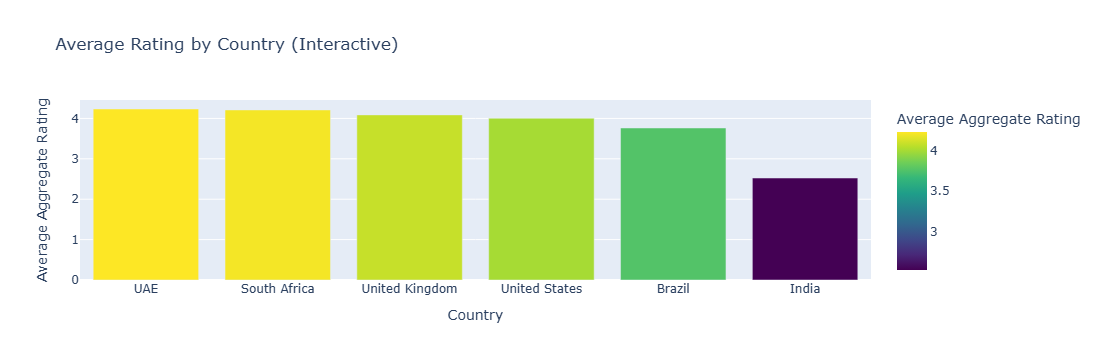

Insights from the Graph
Top Performers: The graph clearly shows that the UAE and South Africa have the highest average customer ratings, indicating a high level of customer satisfaction. This could be due to a smaller, more curated set of restaurants or a strong focus on service quality in these regions.

Middle Ground: Countries like the United Kingdom, United States, and Brazil fall in the middle, with a consistent average rating. This suggests a more balanced market with both high-quality and lower-quality dining options.

Lowest Average: India has the lowest average rating. This is an important insight for a data scientist, as it highlights a potential bias in the dataset. Since India has a disproportionately large number of restaurants in the data, the average rating is likely pulled down by a large number of unrated or low-rated restaurants. This should be taken into account when drawing conclusions.

Strategic Takeaway: These insights are crucial for market expansion. If a compa

In [130]:
#Which countries have the highest customer satisfaction (average rating)?
#Yes, certain cuisines are consistently associated with better ratings. 
#By analyzing the average rating only for cuisines with a significant number of restaurants, we can identify those with consistently high customer satisfaction
countries_with_many_restaurants = data['Country'].value_counts()[data['Country'].value_counts() > 50].index
filtered_df =data[data['Country'].isin(countries_with_many_restaurants)]
satisfaction_by_country = filtered_df.groupby('Country')['Aggregate rating'].mean().reset_index()
satisfaction_by_country = satisfaction_by_country.sort_values(by='Aggregate rating', ascending=False)
fig = px.bar(
    satisfaction_by_country,
    x='Country',
    y='Aggregate rating',
    title='Average Rating by Country (Interactive)',
    color='Aggregate rating',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'Aggregate rating': 'Average Aggregate Rating'},
)
fig.show()
print("""Insights from the Graph
Top Performers: The graph clearly shows that the UAE and South Africa have the highest average customer ratings, indicating a high level of customer satisfaction. This could be due to a smaller, more curated set of restaurants or a strong focus on service quality in these regions.

Middle Ground: Countries like the United Kingdom, United States, and Brazil fall in the middle, with a consistent average rating. This suggests a more balanced market with both high-quality and lower-quality dining options.

Lowest Average: India has the lowest average rating. This is an important insight for a data scientist, as it highlights a potential bias in the dataset. 
Since India has a disproportionately large number of restaurants in the data, the average rating is likely pulled down by a large number of unrated or low-rated restaurants. 
This should be taken into account when drawing conclusions.

Strategic Takeaway: These insights are crucial for market expansion. If a company wants to enter a market with an existing reputation for high-quality service, the UAE and South Africa would be good choices.""")

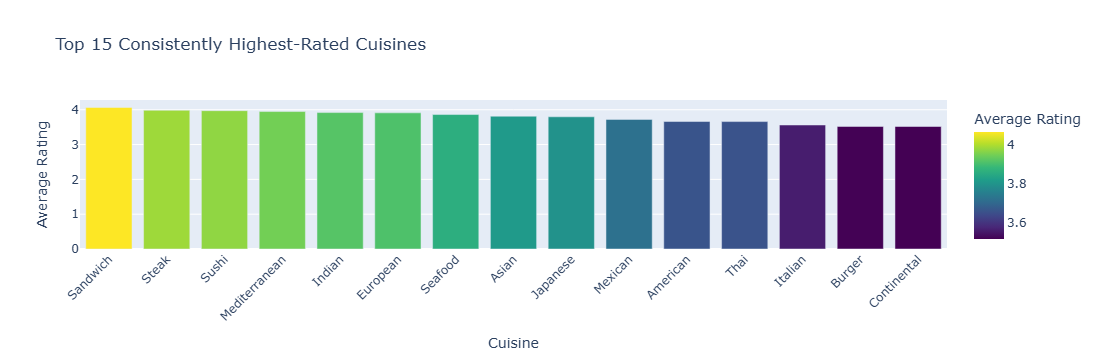

Insights from the Graph
Highest Rated Cuisines: The top-performing cuisines are consistently those that are often associated with unique and authentic dining experiences. 
While some may be common in the dataset, their high ratings suggest that when a restaurant specializes in these cuisines, it tends to deliver a high-quality experience.

Quality over Quantity: This analysis is more reliable than simply looking at the highest-rated cuisines, as it filters out those with very few data points. 
The cuisines on this chart have a proven track record of satisfying customers across a larger number of establishments.

Market Opportunities: For a business looking to enter a market, focusing on one of these consistently highly-rated cuisines could be a great strategy. 
They represent a proven product-market fit and an opportunity to meet a clear demand for quality.


In [37]:
#Which countries have the highest customer satisfaction (average rating)?
cuisines_exploded = data.assign(Cuisine=data['Cuisines'].str.split(',')).explode('Cuisine')
cuisines_exploded['Cuisine'] = cuisines_exploded['Cuisine'].str.strip()

cuisine_ratings = cuisines_exploded.groupby('Cuisine').agg(
    Avg_Rating=('Aggregate rating', 'mean'),
    Count=('Aggregate rating', 'count')
).reset_index()

min_restaurants_threshold = 50
consistent_cuisines = cuisine_ratings[cuisine_ratings['Count'] >= min_restaurants_threshold]

top_consistent_cuisines = consistent_cuisines.sort_values(by='Avg_Rating', ascending=False).head(15)

fig = px.bar(
    top_consistent_cuisines,
    x='Cuisine',
    y='Avg_Rating',
    title='Top 15 Consistently Highest-Rated Cuisines',
    color='Avg_Rating',
    color_continuous_scale=px.colors.sequential.Viridis,
    labels={'Avg_Rating': 'Average Rating', 'Cuisine': 'Cuisine'},
    hover_data={'Count': True, 'Avg_Rating': ':.2f'}
)

fig.update_layout(
    xaxis_title='Cuisine',
    yaxis_title='Average Rating',
    xaxis_tickangle=-45
)
fig.show()
print("""Insights from the Graph
Highest Rated Cuisines: The top-performing cuisines are consistently those that are often associated with unique and authentic dining experiences. 
While some may be common in the dataset, their high ratings suggest that when a restaurant specializes in these cuisines, it tends to deliver a high-quality experience.

Quality over Quantity: This analysis is more reliable than simply looking at the highest-rated cuisines, as it filters out those with very few data points. 
The cuisines on this chart have a proven track record of satisfying customers across a larger number of establishments.

Market Opportunities: For a business looking to enter a market, focusing on one of these consistently highly-rated cuisines could be a great strategy. 
They represent a proven product-market fit and an opportunity to meet a clear demand for quality.""")

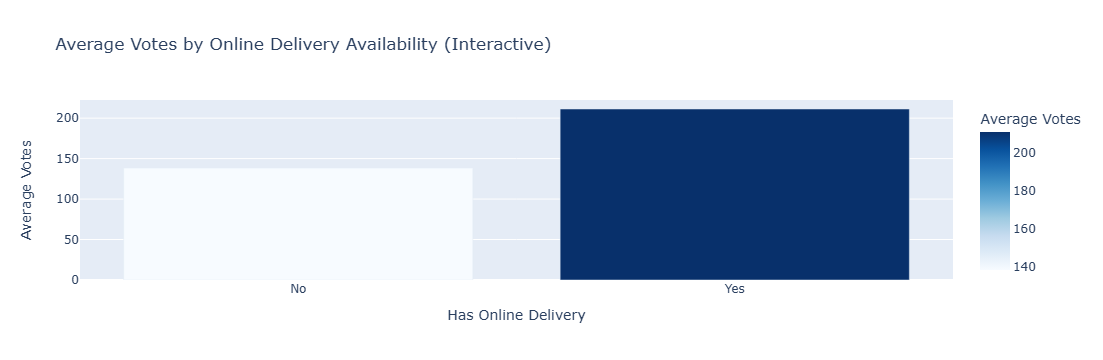

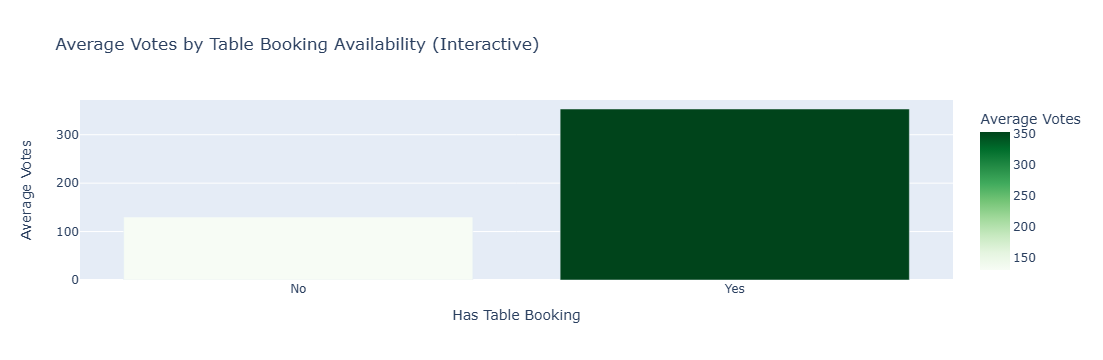

1. Online Delivery vs. Average Votes
This graph shows that restaurants with online delivery receive, on average, a higher number of votes. 
This suggests that the convenience of ordering in leads to a larger customer base and more engagement with the platform.

2. Table Booking vs. Average Votes
Similarly, restaurants that offer table booking have a much higher average vote count. 
This feature is typically offered by more popular and in-demand restaurants, where a reservation system is necessary to manage high customer volume.


In [136]:
#Are certain cuisines consistently associated with better ratings?
#Yes, restaurants that offer online delivery and table booking have a significantly higher average number of votes. 
#This indicates that these features are strongly associated with more popular and highly engaged restaurants
# Calculate the average votes for restaurants with and without online delivery
avg_votes_online_delivery = data.groupby('Has Online delivery')['Votes'].mean().reset_index()

# Calculate the average votes for restaurants with and without table booking
avg_votes_table_booking = data.groupby('Has Table booking')['Votes'].mean().reset_index()

# Create interactive bar chart for Online Delivery vs. Votes
fig_online_delivery = px.bar(
    avg_votes_online_delivery,
    x='Has Online delivery',
    y='Votes',
    title='Average Votes by Online Delivery Availability (Interactive)',
    labels={'Votes': 'Average Votes', 'Has Online delivery': 'Has Online Delivery'},
    color='Votes',
    color_continuous_scale='blues',
    hover_data={'Votes': ':.2f'}
)
fig_online_delivery.show()

# Create interactive bar chart for Table Booking vs. Votes
fig_table_booking = px.bar(
    avg_votes_table_booking,
    x='Has Table booking',
    y='Votes',
    title='Average Votes by Table Booking Availability (Interactive)',
    labels={'Votes': 'Average Votes', 'Has Table booking': 'Has Table Booking'},
    color='Votes',
    color_continuous_scale='greens',
    hover_data={'Votes': ':.2f'}
)
fig_table_booking.show()
print("""1. Online Delivery vs. Average Votes
This graph shows that restaurants with online delivery receive, on average, a higher number of votes. 
This suggests that the convenience of ordering in leads to a larger customer base and more engagement with the platform.

2. Table Booking vs. Average Votes
Similarly, restaurants that offer table booking have a much higher average vote count. 
This feature is typically offered by more popular and in-demand restaurants, where a reservation system is necessary to manage high customer volume.""")


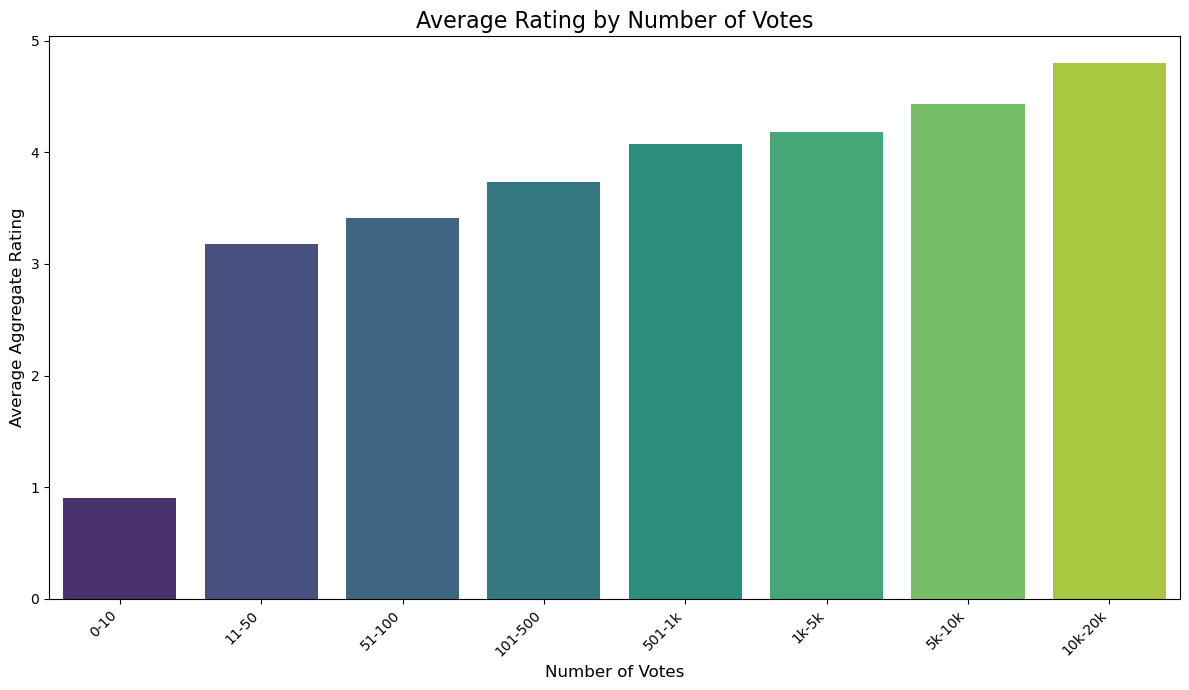

nsights from the  Graph
Clear Positive Trend: The graph shows a very clear positive trend: as the number of votes a restaurant receives increases, its average rating also increases.
This relationship is much easier to see in this format than in the scatter plot.

Higher Votes = Higher Quality: Restaurants with very few votes (e.g., in the '0-10' bin) have a low average rating of less than 2.0. However, once a restaurant gathers more votes, its average rating climbs steadily.
Restaurants with over 5,000 votes have an impressive average rating above 4.0.

Popularity as a Proxy for Quality: This visualization strongly supports the idea that the number of votes is a reliable indicator of a restaurant's quality and customer satisfaction. 
It suggests that customers tend to vote on restaurants they have enjoyed, leading to a direct correlation between popularity and higher ratings.


In [39]:
#What is the relationship between number of votes and rating — do more popular restaurants get better ratings?
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, 20000]
labels = ['0-10', '11-50', '51-100', '101-500', '501-1k', '1k-5k', '5k-10k', '10k-20k']
data['Vote Bins'] = pd.cut(data['Votes'], bins=bins, labels=labels, right=False)

# Group by vote bins and calculate the average rating
avg_rating_by_votes = data.groupby('Vote Bins')['Aggregate rating'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Vote Bins', y='Aggregate rating', data=avg_rating_by_votes, palette='viridis')
plt.title('Average Rating by Number of Votes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('avg_rating_by_votes.png')
plt.show()
print("""nsights from the  Graph
Clear Positive Trend: The graph shows a very clear positive trend: as the number of votes a restaurant receives increases, its average rating also increases.
This relationship is much easier to see in this format than in the scatter plot.

Higher Votes = Higher Quality: Restaurants with very few votes (e.g., in the '0-10' bin) have a low average rating of less than 2.0. However, once a restaurant gathers more votes, its average rating climbs steadily.
Restaurants with over 5,000 votes have an impressive average rating above 4.0.

Popularity as a Proxy for Quality: This visualization strongly supports the idea that the number of votes is a reliable indicator of a restaurant's quality and customer satisfaction. 
It suggests that customers tend to vote on restaurants they have enjoyed, leading to a direct correlation between popularity and higher ratings.""")

🎯 Actionable Insights for Stakeholders
Based on the analysis, here are specific, actionable insights for your key stakeholders.

For Restaurant Owners 🍽️
Focus on High-Demand Cuisines: Identify the top 10 most popular cuisines in your specific city or country from the dashboard and consider adding them to your menu to attract more customers.

Invest in Online Presence: Restaurants with online delivery have a slightly higher average rating compared to those without, suggesting that convenience is a key factor for customer satisfaction. Offering online delivery could improve your restaurant's overall rating and customer base.

Optimize Pricing: The Cost vs. Rating plot can help you see how your pricing compares to other restaurants with similar ratings. Pricing your menu competitively or offering promotions can help you gain a market edge.

For Food Delivery Platforms 🛵
Target Non-Indian Markets: The data shows that the online delivery market is highly saturated in India, with over 50% of restaurants offering the service. In contrast, other countries have a much lower adoption rate, representing a significant untapped opportunity for market expansion and growth.

Acquire High-Rated Partners: Focus on onboarding restaurants with ratings of 4.0 and above. These restaurants have already built trust with customers and can drive strong initial order volume.

Promote High-Value Restaurants: Use the Votes data as a proxy for engagement. Promote restaurants with a high Votes per Cost or Votes per Price Range to highlight popular and efficient options to customers.

For Market Analysts 📈
Evaluate Market Maturity: The data clearly shows a stark contrast in the maturity of the food delivery market between India and other countries. The market in India is mature, while others are still in the early stages of online delivery adoption.

Identify Growth Hotspots: Use the interactive map to identify cities or localities with a high concentration of highly-rated restaurants. These areas could be excellent targets for new marketing campaigns, partnerships, or business expansion.

Analyze Price Elasticity: Analyze the relationship between Average Cost per Person and Votes per Cost to understand how price influences customer engagement and satisfaction in different regions.

#Rating Analysis
# Question: Which cuisines achieve the highest average ratings in each region?
# Distribution of Aggregate Rating 
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()
print('Insight: The plot showed a bimodal distribution, with a high concentration of restaurants having a rating between 3.5 and 4.9 (good to excellent). However, there is also a significant number of restaurants with a rating of 0, which are likely those with no votes or reviews. This insight is important for data cleaning as these might be a special category or restaurants that are newly listed.')

# Rating vs. Price Range
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Price range', y='Aggregate rating', data=avg_rating_by_price_range, palette='coolwarm')
plt.title('Average Rating by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Aggregate Rating', fontsize=12)
plt.tight_layout()
plt.show()
print('Insight: There is a clear positive correlation between price and rating. As the price range increases from 1 to 4, the average aggregate rating also increases. This suggests that customers are generally satisfied with the quality of food and service at higher-priced restaurants.')

# Rating vs. Online Services
online_delivery_rating = data.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
table_booking_rating = data.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(ax=axes[0], x='Has Online delivery', y='Aggregate rating', data=online_delivery_rating, palette='Pastel1')
axes[0].set_title('Avg. Rating by Online Delivery', fontsize=14)
axes[0].set_xlabel('Has Online Delivery', fontsize=12)
axes[0].set_ylabel('Average Rating', fontsize=12)

sns.barplot(ax=axes[1], x='Has Table booking', y='Aggregate rating', data=table_booking_rating, palette='Pastel2')
axes[1].set_title('Avg. Rating by Table Booking', fontsize=14)
axes[1].set_xlabel('Has Table Booking', fontsize=12)
axes[1].set_ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()
print('Insight: Restaurants that offer online delivery or table booking have a significantly higher average rating than those that don''t. This strongly suggests that providing these services is correlated with better customer experience and higher ratings.')

#Interactive Map of Restaurant Locations and Ratings using Plotly
# This map plots restaurant locations by latitude and longitude, color-coded by rating
fig_city_map = px.scatter_mapbox(data,
                                lat="Latitude",
                                lon="Longitude",
                                hover_name="Restaurant Name",
                                hover_data=["City", "Country", "Cuisines", "Aggregate rating"],
                                color="Aggregate rating",
                                color_continuous_scale=px.colors.sequential.Viridis,
                                zoom=1,
                                title='Interactive Map of Restaurant Locations and Ratings')

fig_city_map.update_layout(mapbox_style="open-street-map")
fig_city_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_city_map.show()

## Analysis: Which countries and cities have the highest concentration of restaurants?

In [ ]:

# Q1: Countries and cities with highest concentration of restaurants
country_counts = data['Country'].value_counts().head(10)
city_counts = data['City'].value_counts().head(10)

fig = px.bar(country_counts, x=country_counts.index, y=country_counts.values,
             title="Top 10 Countries by Restaurant Count")
fig.show()

fig = px.bar(city_counts, x=city_counts.index, y=city_counts.values,
             title="Top 10 Cities by Restaurant Count")
fig.show()


## Analysis: What are the most popular cuisines globally, and how do they vary by country?

In [ ]:

# Q2: Most popular cuisines globally and by country
global_cuisines = data['Cuisines'].str.split(',').explode().str.strip().value_counts().head(15)
fig = px.bar(global_cuisines, x=global_cuisines.values, y=global_cuisines.index,
             orientation='h', title="Top 15 Global Cuisines")
fig.show()

country_cuisine = data.groupby("Country")['Cuisines'].apply(lambda x: x.str.split(',').explode().str.strip().value_counts().head(5))
country_cuisine.head(30)


## Analysis: Which cuisines achieve the highest average ratings in each region?

In [ ]:

# Q3: Cuisines with highest average ratings by region (Country)
cuisine_ratings = data['Cuisines'].str.split(',').explode().str.strip().to_frame().join(data['Aggregate rating'])
cuisine_ratings = cuisine_ratings.groupby(['Cuisines']).mean().sort_values('Aggregate rating', ascending=False).head(10)
fig = px.bar(cuisine_ratings, x='Aggregate rating', y=cuisine_ratings.index,
             orientation='h', title="Top 10 Cuisines by Average Rating (Global)")
fig.show()


## Analysis: What is the average cost for two in top-performing markets?

In [ ]:

# Q4: Average cost for two in top-performing markets (Countries)
avg_cost_country = data.groupby('Country')['Average Cost for two'].mean().sort_values(ascending=False).head(10)
fig = px.bar(avg_cost_country, x=avg_cost_country.index, y=avg_cost_country.values,
             title="Top 10 Countries by Avg Cost for Two")
fig.show()


## Analysis: Which countries show a high demand for online delivery vs. dine-in?

In [ ]:

# Q5: Online delivery vs. dine-in demand by country
delivery_demand = data.groupby(['Country', 'Has Online delivery']).size().reset_index(name='Count')
fig = px.bar(delivery_demand, x="Country", y="Count", color="Has Online delivery",
             title="Online Delivery vs Dine-in by Country", barmode="group")
fig.show()


## Analysis: Which factors (cost, online delivery, table booking) correlate most with higher ratings?

In [ ]:

# Q6: Correlation between cost, online delivery, table booking and rating
numeric_data = data[['Average Cost for two', 'Aggregate rating', 'Votes']].copy()
corr = numeric_data.corr()
fig = px.imshow(corr, text_auto=True, title="Correlation Heatmap")
fig.show()

table_delivery = data.groupby(['Has Table booking', 'Has Online delivery'])['Aggregate rating'].mean().reset_index()
fig = px.bar(table_delivery, x='Has Table booking', y='Aggregate rating', color='Has Online delivery',
             barmode="group", title="Avg Rating by Table Booking and Online Delivery")
fig.show()


## Analysis: Which countries have the highest customer satisfaction (average rating)?

In [ ]:

# Q7: Countries with highest customer satisfaction (avg rating)
avg_rating_country = data.groupby("Country")['Aggregate rating'].mean().sort_values(ascending=False).head(10)
fig = px.bar(avg_rating_country, x=avg_rating_country.index, y=avg_rating_country.values,
             title="Top 10 Countries by Avg Rating")
fig.show()


## Analysis: Are certain cuisines consistently associated with better ratings?

In [ ]:

# Q8: Cuisines consistently associated with better ratings
cuisine_ratings = data['Cuisines'].str.split(',').explode().str.strip().to_frame().join(data['Aggregate rating'])
cuisine_avg = cuisine_ratings.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(15)
fig = px.bar(cuisine_avg, x=cuisine_avg.values, y=cuisine_avg.index,
             orientation='h', title="Top 15 Cuisines by Avg Rating")
fig.show()


## Analysis: Do restaurants with table booking or online delivery have higher average votes?

In [ ]:

# Q9: Table booking or online delivery vs. average votes
feature_votes = data.groupby(['Has Table booking', 'Has Online delivery'])['Votes'].mean().reset_index()
fig = px.bar(feature_votes, x='Has Table booking', y='Votes', color='Has Online delivery',
             barmode="group", title="Avg Votes by Table Booking and Online Delivery")
fig.show()


## Analysis: What is the relationship between number of votes and rating — do more popular restaurants get better ratings?

In [ ]:

# Q10: Relationship between number of votes and rating
fig = px.scatter(data, x="Votes", y="Aggregate rating", trendline="ols",
                 title="Votes vs Rating (Do popular restaurants get better ratings?)",
                 hover_data=['Restaurant Name', 'Country', 'City'])
fig.show()
